In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, AutoDateLocator 
import numpy as np
import datetime

In [2]:
df_gps = pd.read_csv('/Users/hburd/Downloads/Command_Pod_Export.csv', skiprows=1)

In [3]:
df_aprs = pd.read_csv('/Users/hburd/Downloads/aprsfi_export_KD9ZSA-11_20240407_175243_20240410_175243.csv')

In [4]:
df_aprs.head()
df_gps.head()

,Timestamp,Time(sec),Humidity (RH%),Pressure (PSI),Ext Temperature (F),Int Temperature (F),Battery (V),Rate (ft/min),Altitude (ft),Speed (mph),Heading (deg),Timestamp.1,TimeShift(sec),Active,Latitude,Longitude,Altitude(ft),Speed(mph),Heading
0,4/8/2024 1:21:53 PM,0.000,-18.59859,14.584394,98.98395,125.37705,8.064375,0.0000,485.5584,0.00000,0.000000,4/8/2024 1:21:55 PM,2.084,1,38.741930,-88.076793,485.6,0.4,357.0
1,4/8/2024 1:21:55 PM,2.004,-19.77048,14.584394,98.98395,123.61751,8.064375,-19.6848,485.5584,0.00000,0.000000,4/8/2024 1:21:55 PM,0.080,1,38.741930,-88.076793,485.6,0.4,357.0
2,4/8/2024 1:22:00 PM,6.980,-18.85901,14.584394,98.98395,124.49728,8.064375,19.6848,492.1200,0.41436,356.980011,4/8/2024 1:21:55 PM,-4.896,1,38.741930,-88.076793,485.6,0.4,357.0
3,4/8/2024 1:22:07 PM,13.999,-15.34334,14.657618,99.86372,124.49728,8.035050,19.6848,492.1200,0.41436,356.980011,4/8/2024 1:22:07 PM,0.100,1,38.741922,-88.076775,492.1,0.6,33.6
4,4/8/2024 1:22:12 PM,18.989,-16.12460,14.639312,99.86372,122.73774,8.035050,-19.6848,485.5584,0.63305,33.570000,4/8/2024 1:22:13 PM,1.105,1,38.741930,-88.076783,485.6,0.7,218.6


In [5]:
df_aprs.info()
df_gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      168 non-null    object 
 1   lasttime  168 non-null    object 
 2   lat       168 non-null    float64
 3   lng       168 non-null    float64
 4   speed     168 non-null    int64  
 5   course    168 non-null    int64  
 6   altitude  168 non-null    float64
 7   comment   166 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 10.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            310 non-null    object 
 1   Time(sec)            310 non-null    float64
 2   Humidity (RH%)       310 non-null    float64
 3   Pressure (PSI)       310 non-null    float64
 4   Ext Temperature (F)  310 non-null

array([[<Axes: title={'center': 'Time(sec)'}>,
        <Axes: title={'center': 'Humidity (RH%)'}>,
        <Axes: title={'center': 'Pressure (PSI)'}>,
        <Axes: title={'center': 'Ext Temperature (F)'}>],
       [<Axes: title={'center': 'Int Temperature (F)'}>,
        <Axes: title={'center': 'Battery (V)'}>,
        <Axes: title={'center': 'Rate (ft/min)'}>,
        <Axes: title={'center': 'Altitude (ft)'}>],
       [<Axes: title={'center': 'Speed (mph)'}>,
        <Axes: title={'center': 'Heading (deg)'}>,
        <Axes: title={'center': 'TimeShift(sec)'}>,
        <Axes: title={'center': 'Active'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Altitude(ft)'}>,
        <Axes: title={'center': 'Speed(mph)'}>],
       [<Axes: title={'center': 'Heading '}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

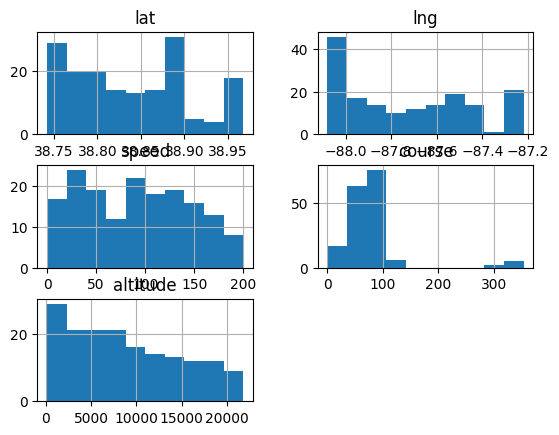

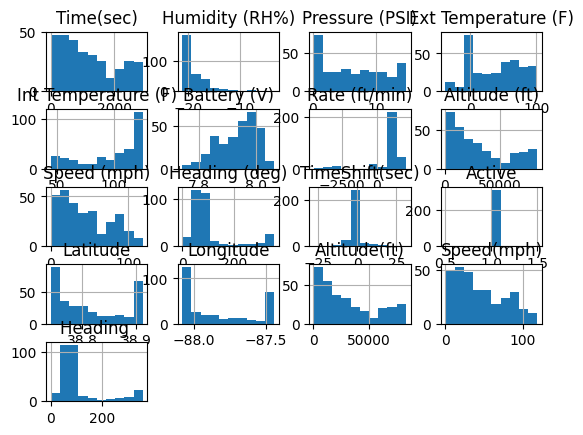

In [6]:
df_aprs.hist()
df_gps.hist()

In [7]:
def validateDate(objNum):
    try:
        date = pd.to_datetime(objNum)
        return date
    except:
        return np.nan

In [8]:
time_gps = df_gps['Timestamp']
time_gps = time_gps.apply(validateDate)
df_gps['Timestamp'] = time_gps

In [9]:
time_aprs = df_aprs['time']
time_aprs = time_aprs.apply(validateDate)
df_aprs['time'] = time_aprs

In [10]:
df_gps['Timestamp'] += pd.Timedelta(hours=5)

In [11]:
df_aprs.head(4)

,time,lasttime,lat,lng,speed,course,altitude,comment
0,2024-04-08 18:24:19,2024-04-08 18:24:19,38.74217,-88.07767,35,343,452.02,NaN
1,2024-04-08 18:24:34,2024-04-08 18:24:34,38.74283,-88.07833,19,40,569.98,NaN
2,2024-04-08 18:24:49,2024-04-08 18:24:49,38.74317,-88.07850,9,309,680.92,DePaul HAB Low
3,2024-04-08 18:25:19,2024-04-08 18:25:19,38.74417,-88.07883,33,51,925.07,DePaul HAB Low


In [30]:
df_gps['time'] = df_gps['Timestamp']
df_gps.head(4)

,Timestamp,Time(sec),Humidity (RH%),Pressure (PSI),Ext Temperature (F),Int Temperature (F),Battery (V),Rate (ft/min),Altitude (ft),Speed (mph),Heading (deg),Timestamp.1,TimeShift(sec),Active,Latitude,Longitude,Altitude(ft),Speed(mph),Heading,time
0,2024-04-08 18:21:53,0.000,-18.59859,14.584394,98.98395,125.37705,8.064375,0.0000,485.5584,0.00000,0.000000,4/8/2024 1:21:55 PM,2.084,1,38.741930,-88.076793,485.6,0.4,357.0,2024-04-08 18:21:53
1,2024-04-08 18:21:55,2.004,-19.77048,14.584394,98.98395,123.61751,8.064375,-19.6848,485.5584,0.00000,0.000000,4/8/2024 1:21:55 PM,0.080,1,38.741930,-88.076793,485.6,0.4,357.0,2024-04-08 18:21:55
2,2024-04-08 18:22:00,6.980,-18.85901,14.584394,98.98395,124.49728,8.064375,19.6848,492.1200,0.41436,356.980011,4/8/2024 1:21:55 PM,-4.896,1,38.741930,-88.076793,485.6,0.4,357.0,2024-04-08 18:22:00
3,2024-04-08 18:22:07,13.999,-15.34334,14.657618,99.86372,124.49728,8.035050,19.6848,492.1200,0.41436,356.980011,4/8/2024 1:22:07 PM,0.100,1,38.741922,-88.076775,492.1,0.6,33.6,2024-04-08 18:22:07


In [66]:
merged_df = pd.merge(df_gps, df_aprs, on='time', how='outer')
merged_df.to_csv('/Users/hburd/Downloads/modified_file.csv', index=False)

In [34]:
merged_df.info()
merged_df.sort_values(by='time', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            310 non-null    datetime64[ns]
 1   Time(sec)            310 non-null    float64       
 2   Humidity (RH%)       310 non-null    float64       
 3   Pressure (PSI)       310 non-null    float64       
 4   Ext Temperature (F)  310 non-null    float64       
 5   Int Temperature (F)  310 non-null    float64       
 6   Battery (V)          310 non-null    float64       
 7   Rate (ft/min)        310 non-null    float64       
 8   Altitude (ft)        310 non-null    float64       
 9   Speed (mph)          310 non-null    float64       
 10  Heading (deg)        310 non-null    float64       
 11  Timestamp.1          310 non-null    object        
 12  TimeShift(sec)       310 non-null    float64       
 13  Active               310 non-null  

In [35]:
start_time = pd.to_datetime('17:30').time()
end_time = pd.to_datetime('20:30').time()
mask = merged_df['time'].dt.time.between(start_time,end_time)
merged_df = merged_df[mask]
#mask to filter out the time where the aprs tracker was landed and no data was captured for the gps


In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 0 to 462
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            310 non-null    datetime64[ns]
 1   Time(sec)            310 non-null    float64       
 2   Humidity (RH%)       310 non-null    float64       
 3   Pressure (PSI)       310 non-null    float64       
 4   Ext Temperature (F)  310 non-null    float64       
 5   Int Temperature (F)  310 non-null    float64       
 6   Battery (V)          310 non-null    float64       
 7   Rate (ft/min)        310 non-null    float64       
 8   Altitude (ft)        310 non-null    float64       
 9   Speed (mph)          310 non-null    float64       
 10  Heading (deg)        310 non-null    float64       
 11  Timestamp.1          310 non-null    object        
 12  TimeShift(sec)       310 non-null    float64       
 13  Active               310 non-null    flo

In [59]:
merged_df['altitude_ft'] = merged_df['altitude'].apply(lambda x: x * 3.28084)
merged_df['speed_mph'] = merged_df['speed'].apply(lambda x: x * 0.621371)

In [60]:
merged_df['altitude_ft']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
458    3956.988316
459    2460.006640
460    1010.006594
461     462.007889
462     518.011828
Name: altitude_ft, Length: 463, dtype: float64

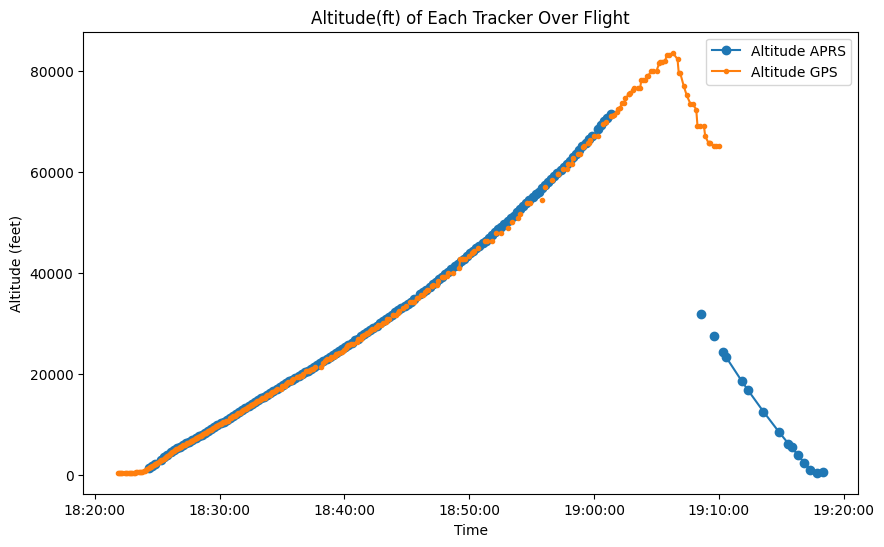

In [57]:
#plot altitudes over flight
plt.figure(figsize=(10,6))
plt.plot(merged_df['time'], merged_df['altitude_ft'], label='Altitude APRS', marker='o', linestyle='-')
plt.plot(merged_df['time'], merged_df['Altitude(ft)'], label='Altitude GPS', marker='.', linestyle='-')
#labelling
plt.xlabel('Time')
plt.ylabel('Altitude (feet)')
plt.title("Altitude(ft) of Each Tracker Over Flight")
plt.legend()
#format time and date
date_locator = AutoDateLocator()
date_formatter = DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_locator(date_locator)
plt.gca().xaxis.set_major_formatter(date_formatter)

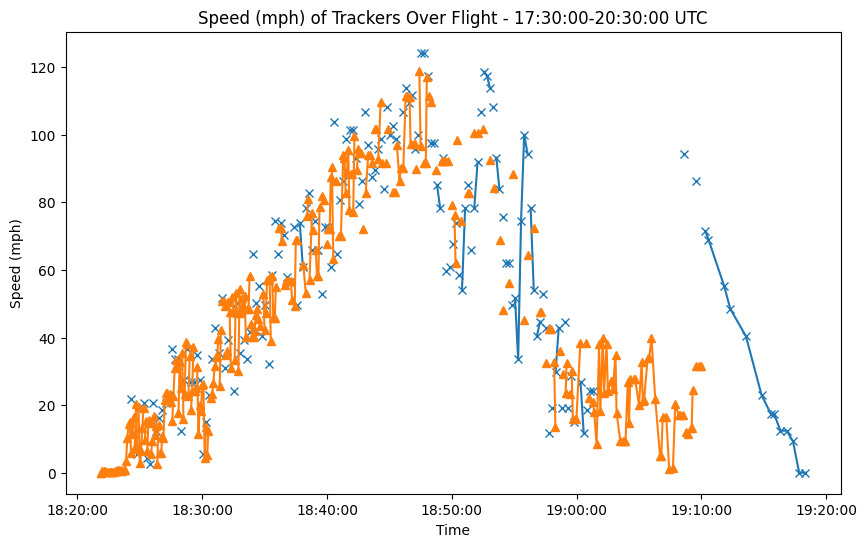

In [64]:
plt.figure(figsize=(10,6))
#set size
#plot altitudes
plt.plot(merged_df['time'], merged_df['speed_mph'], label='Altitude APRS', marker='x', linestyle='-')
plt.plot(merged_df['time'], merged_df['Speed (mph)'], label='Altitude GPS', marker='^', linestyle='-')
#labelling
plt.xlabel('Time')
plt.ylabel('Speed (mph)')
plt.title("Speed (mph) of Trackers Over Flight - 17:30:00-20:30:00 UTC")

#format time and date
date_locator = AutoDateLocator()
date_formatter = DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_locator(date_locator)
plt.gca().xaxis.set_major_formatter(date_formatter)